# ***IMPORTING DATASET***

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
data=pd.read_csv('/content/loan_data.csv')

# ***EDA***

In [81]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [82]:
data.shape

(45000, 14)

In [83]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

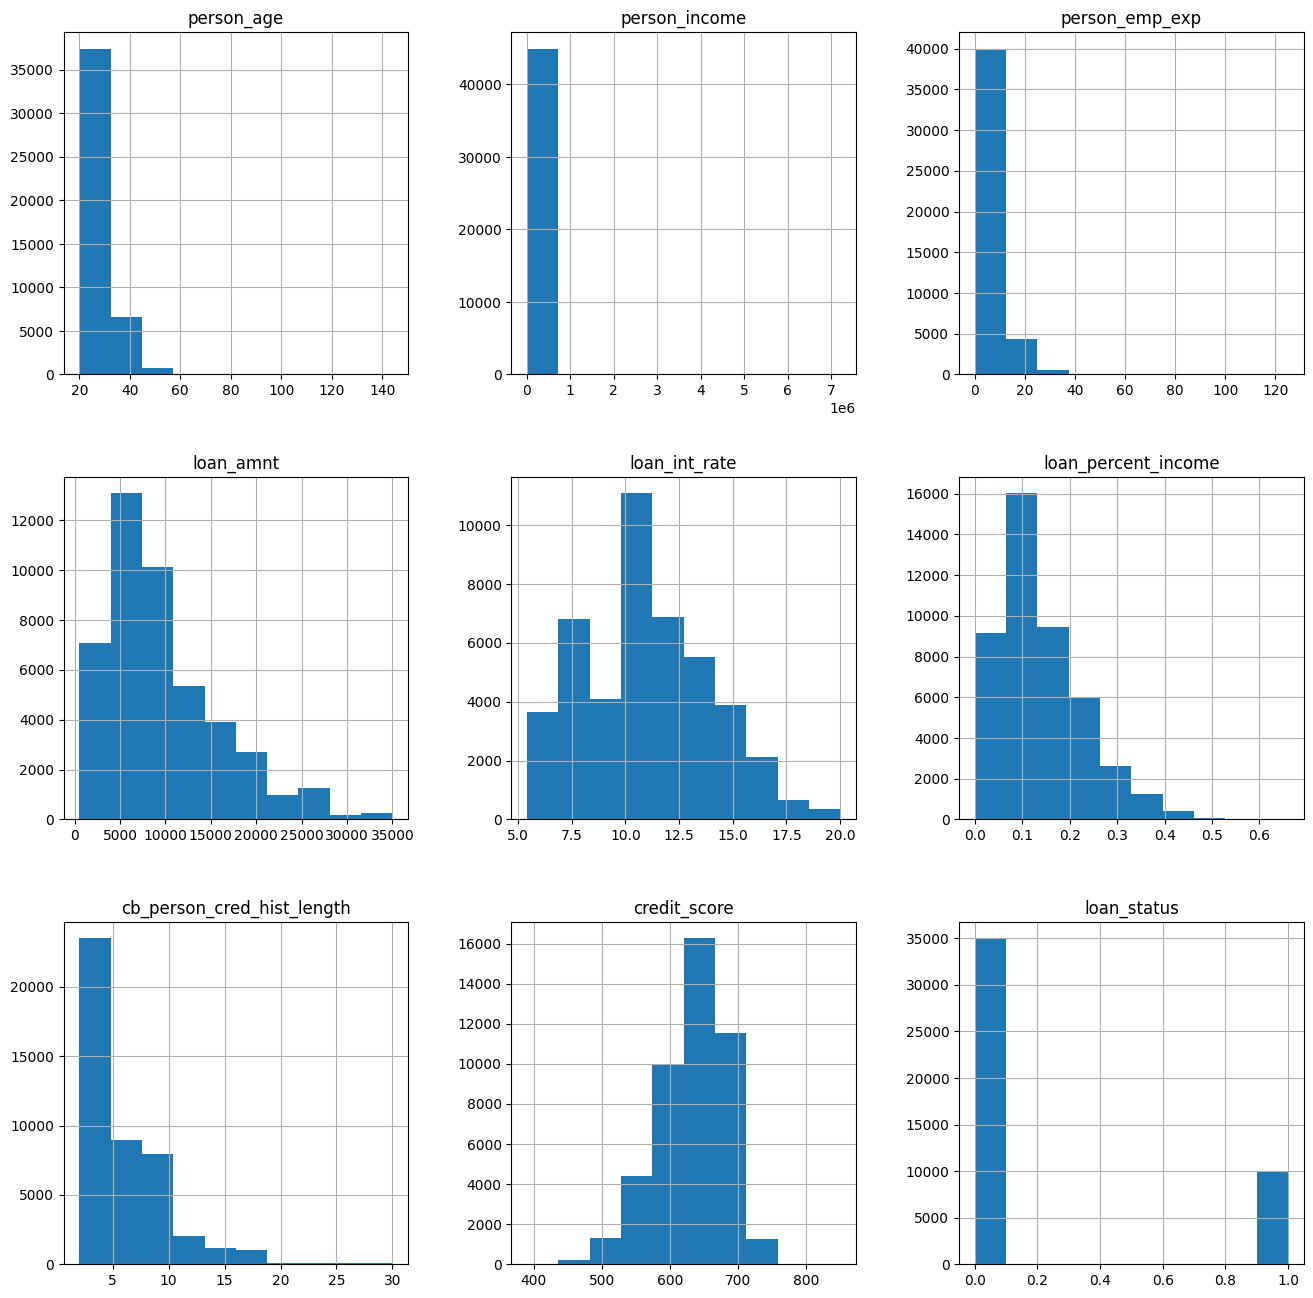

In [85]:
#Analyze distributions for numerical columns
data.hist(figsize=(16, 16))
plt.show()


<Axes: xlabel='loan_status', ylabel='count'>

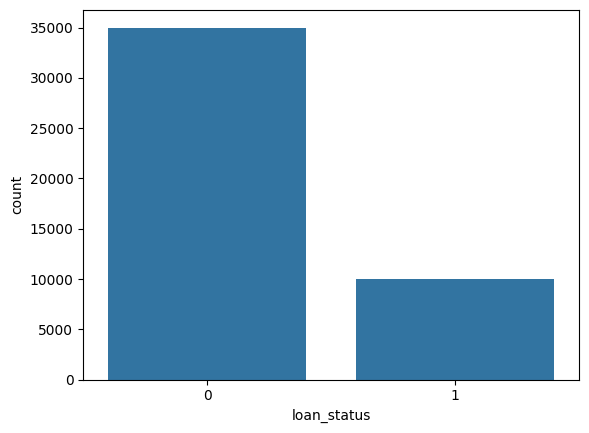

In [86]:
#Analyze categorical features using counts:
sns.countplot(x='loan_status', data=data)


# ***DATA PREPROCESSING***

In [87]:
data = data.drop_duplicates()


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in data.columns:
    # Check if the column is of object type (categorical)
    if data[col].dtype == 'object':
        # Apply label encoding to the column
        data[col] = le.fit_transform(data[col])
        # Print the mapping of original values to encoded values
        print(f"Column: {col}")
        for i, category in enumerate(le.classes_):
            print(f"{category}: {i}")
        print("-" * 20)

Column: person_gender
female: 0
male: 1
--------------------
Column: person_education
Associate: 0
Bachelor: 1
Doctorate: 2
High School: 3
Master: 4
--------------------
Column: person_home_ownership
MORTGAGE: 0
OTHER: 1
OWN: 2
RENT: 3
--------------------
Column: loan_intent
DEBTCONSOLIDATION: 0
EDUCATION: 1
HOMEIMPROVEMENT: 2
MEDICAL: 3
PERSONAL: 4
VENTURE: 5
--------------------
Column: previous_loan_defaults_on_file
No: 0
Yes: 1
--------------------


In [89]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


# ***TARGET FEATURES SPLIT***

In [90]:
X=data.drop('loan_status',axis=1)
y=data['loan_status']

# ***TRAIN TEST SPLIT***

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ***Random Forest***

Random Forest Accuracy: 0.9247407407407408
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.88      0.77      0.82      3007

    accuracy                           0.92     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.92      0.92     13500



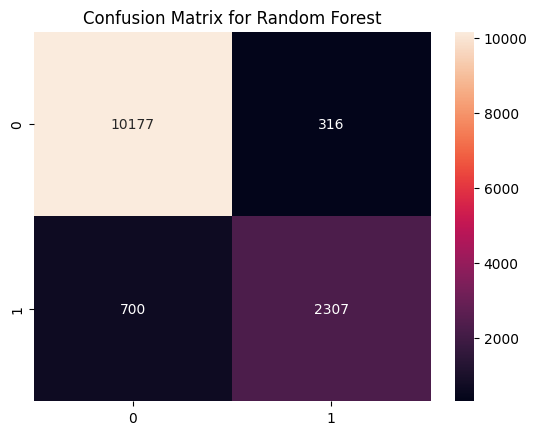

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ***Logistic Regression***

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8421481481481482
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10493
           1       0.72      0.48      0.57      3007

    accuracy                           0.84     13500
   macro avg       0.79      0.71      0.74     13500
weighted avg       0.83      0.84      0.83     13500



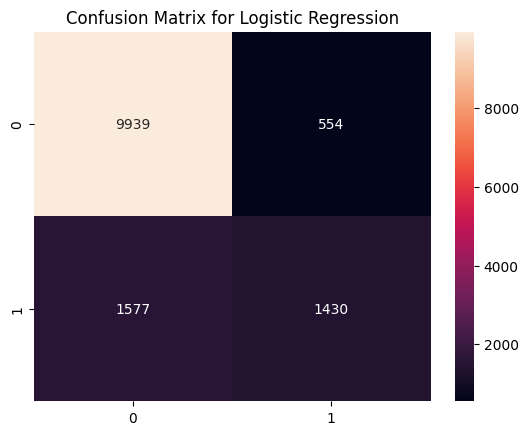

In [93]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# ***Decision Tree***

Decision Tree Accuracy: 0.8973333333333333
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10493
           1       0.76      0.78      0.77      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.86      0.85     13500
weighted avg       0.90      0.90      0.90     13500



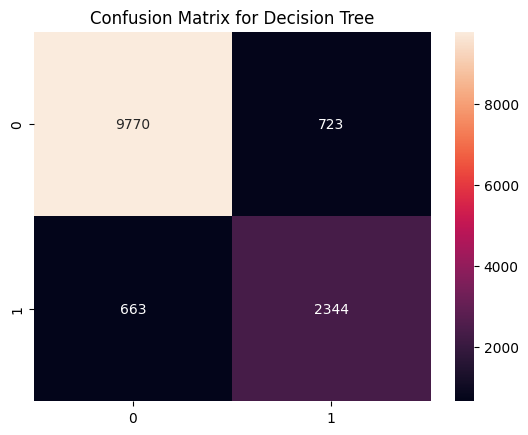

In [94]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Accuracy: {accuracy_dtc}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtc))

cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, fmt='d')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# ***SVC***

SVC Accuracy: 0.8005185185185185
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     10493
           1       0.82      0.13      0.23      3007

    accuracy                           0.80     13500
   macro avg       0.81      0.56      0.56     13500
weighted avg       0.80      0.80      0.74     13500



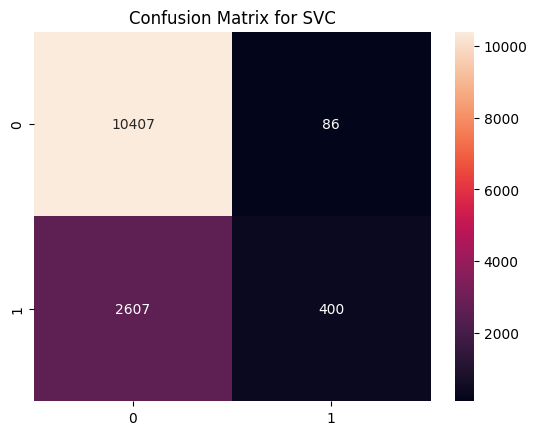

In [95]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc}")
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title('Confusion Matrix for SVC')
plt.show()

# ***Models Comparison***

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'SVC'],
    'Accuracy': [accuracy_rf, accuracy_logreg, accuracy_dtc, accuracy_svc],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_logreg),
        precision_score(y_test, y_pred_dtc),
        precision_score(y_test, y_pred_svc),
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_logreg),
        recall_score(y_test, y_pred_dtc),
        recall_score(y_test, y_pred_svc),
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_dtc),
        f1_score(y_test, y_pred_svc),
    ],
}

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.924741,0.879527,0.767210,0.819538
1,Logistic Regression,0.842148,0.720766,0.475557,0.573031
2,Decision Tree,0.897333,0.764265,0.779514,0.771814
3,SVC,0.800519,0.823045,0.133023,0.229029


# ***PROJECT GUI***

In [97]:
!pip install gradio


In [98]:
import joblib
import gradio as gr
# Save the model (if needed)
joblib.dump(rf_classifier, 'random_forest_model.pkl')

# Load the saved model
model = joblib.load('random_forest_model.pkl')

In [99]:
import joblib
import gradio as gr
import pandas as pd

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Feature columns for inputs
input_columns = [
    'person_age', 'person_gender', 'person_education', 'person_income',
    'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
    'credit_score', 'previous_loan_defaults_on_file'
]

# Mapping for categorical columns
gender_map = {0: "Female", 1: "Male"}
education_map = {0: "Associate", 1: "Bachelor", 2: "Doctorate", 3: "High School", 4: "Master"}
home_ownership_map = {0: "Mortgage", 1: "Other", 2: "Own", 3: "Rent"}
loan_intent_map = {0: "Debt Consolidation", 1: "Education", 2: "Home Improvement",
                   3: "Medical", 4: "Personal", 5: "Venture"}
default_map = {0: "No", 1: "Yes"}

# Reverse mapping for prediction input
reverse_maps = {
    'person_gender': {v: k for k, v in gender_map.items()},
    'person_education': {v: k for k, v in education_map.items()},
    'person_home_ownership': {v: k for k, v in home_ownership_map.items()},
    'loan_intent': {v: k for k, v in loan_intent_map.items()},
    'previous_loan_defaults_on_file': {v: k for k, v in default_map.items()}
}

# Prediction function
def predict_loan(person_age, person_gender, person_education, person_income, person_emp_exp,
                 person_home_ownership, loan_amnt, loan_intent, loan_int_rate,
                 loan_percent_income, cb_person_cred_hist_length, credit_score,
                 previous_loan_defaults_on_file):
    try:
        # Map categorical inputs to numerical
        inputs = {
            'person_age': person_age,
            'person_gender': reverse_maps['person_gender'][person_gender],
            'person_education': reverse_maps['person_education'][person_education],
            'person_income': person_income,
            'person_emp_exp': person_emp_exp,
            'person_home_ownership': reverse_maps['person_home_ownership'][person_home_ownership],
            'loan_amnt': loan_amnt,
            'loan_intent': reverse_maps['loan_intent'][loan_intent],
            'loan_int_rate': loan_int_rate,
            'loan_percent_income': loan_percent_income,
            'cb_person_cred_hist_length': cb_person_cred_hist_length,
            'credit_score': credit_score,
            'previous_loan_defaults_on_file': reverse_maps['previous_loan_defaults_on_file'][previous_loan_defaults_on_file]
        }

        # Convert input to DataFrame
        input_data = pd.DataFrame([inputs])

        # Predict
        prediction = model.predict(input_data)[0]
        return "✅ Loan Approved!" if prediction == 1 else "❌ Loan Rejected!"
    except Exception as e:
        return f"Error: {e}"

# Input components
inputs = [
    gr.Number(label="🔢 Age", value=30, precision=0),
    gr.Dropdown(label="👤 Gender", choices=list(gender_map.values())),
    gr.Dropdown(label="🎓 Education Level", choices=list(education_map.values())),
    gr.Number(label="💵 Annual Income (in $)", value=50000),
    gr.Number(label="📅 Years of Employment", value=5),
    gr.Dropdown(label="🏠 Home Ownership", choices=list(home_ownership_map.values())),
    gr.Number(label="📊 Loan Amount (in $)", value=10000),
    gr.Dropdown(label="🎯 Loan Purpose", choices=list(loan_intent_map.values())),
    gr.Number(label="📈 Interest Rate (%)", value=5.0),
    gr.Number(label="💸 Loan Percent Income (%)", value=30.0),
    gr.Number(label="📜 Credit History Length (Years)", value=10),
    gr.Number(label="⭐ Credit Score", value=700),
    gr.Dropdown(label="🔍 Previous Loan Defaults", choices=list(default_map.values()))
]

# Output component
outputs = gr.Textbox(label="💡 Loan Approval Status", interactive=False)

# Interface Design with custom theme
gr.Interface(
    fn=predict_loan,
    inputs=inputs,
    outputs=outputs,
    title="🏦 Loan Approval Prediction System",
    description="""
    <div style="text-align: center;">
        <h2 style="color: #4CAF50;">Welcome to the Loan Approval Prediction System!</h2>
        <p style="font-size: 16px; color: #333;">
            Developed by <b>Syed Mohammad Ali Ashar</b>. This tool uses a trained Random Forest model to predict loan approval status.
        </p>
        <p style="font-size: 14px; color: #666;">
            Fill in the details below, click <b>'Submit'</b>, and get instant predictions.
        </p>
    </div>
    """,
    theme="huggingface",  # Optional: Adds a sleek theme
    live=True
).launch()


/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:1049: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-677e9450-558ce338329df8a87c69e4b8;40f83ac3-7d94-48a1-a54a-0b153e42c896)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://87e624df504c90bc64.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
